### Devivaraprasad Rathikindi Assessment

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("D:/COLLEGE/RandWalk_DS/RandWalk-DS-Assessment/books.csv")

In [3]:
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


Q1: How many rows and columns are there in books.csv dataset?

In [4]:
n_rows, n_cols = df.shape

print(f'The books.csv dataset has {n_rows} rows and {n_cols} columns.')

The books.csv dataset has 399 rows and 24 columns.


Q2: How many books do not have an original title?

In [5]:
without_orig_title = df['original_title'].isnull().sum()

print(f'The number of books without an original title : {without_orig_title}')

The number of books without an original title : 36


Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [6]:
df_clean = df.dropna(subset=['original_title'])

In [7]:
unique_book = df_clean['book_id'].nunique()

print(f'The number of unique books that are present in the dataset : {unique_book}')

The number of unique books that are present in the dataset : 363


Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [8]:
avg_rating = df['average_rating'].mean()

print(f'Avg rating : {avg_rating}')

Avg rating : 3.9837844611528817


In [9]:
#Let's format the result to two decimal places

print(f'The avg rating of all the books in the dataset is : {avg_rating:.2f}')

The avg rating of all the books in the dataset is : 3.98


Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [10]:
b_count = df[df['original_publication_year'] == 2000].shape[0]

print(f'The number of books published in the year 2000 : {b_count}')

The number of books published in the year 2000 : 8


Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [11]:
max_rating = df.loc[df['work_ratings_count'].idxmax()]['title']

print(f'The book with max number of ratings : {max_rating}')

The book with max number of ratings : The Diary of a Young Girl


Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [12]:
rating_buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

df['rating_bucket'] = pd.cut(df['average_rating'], bins=rating_buckets, precision=2, right=False)

df['rating_bucket'] = df['rating_bucket'].astype(str)

rating_counts = df['rating_bucket'].value_counts().sort_index()

rating_counts

[3.0, 3.5)      7
[3.5, 4.0)    191
[4.0, 4.5)    199
[4.5, 5.0)      2
Name: rating_bucket, dtype: int64

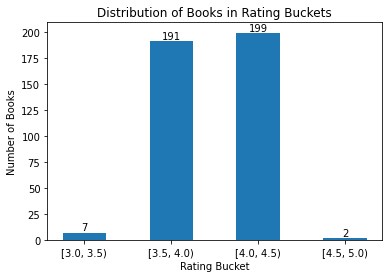

In [13]:
bars = plt.bar(rating_counts.index, rating_counts.values, width=0.5)

for bar in bars:
    bar_height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, bar_height, bar_height, ha='center', va='bottom')

plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Distribution of Books in Rating Buckets')
plt.show()